# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()
date_today = today.strftime("%m/%d/%y")
print(date_today)

url = "api.openweathermap.org/data/2.5/weather?"

04/17/20


In [2]:
# Build partial query URL 
query_url = f"{url}appid={weather_api_key}&q="

In [3]:
# Create city dataframe
city_df = pd.read_csv('output_data/cities.csv')
city_df.dropna(inplace = True) 

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lats_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

610

In [5]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Ski

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [7]:
# Remove cities with missing data 
clean_weather = weather_data.dropna(how='any')
clean_weather.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [8]:
# Save data frame to CSV
clean_weather.to_csv('output_data/weather_data.csv')

# Display data frame head 
clean_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_cities = clean_weather.loc[(clean_weather["Humidity"] >= 100)].count()
high_humidity_cities.head()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
dtype: int64

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = clean_weather
clean_city_data.drop(clean_weather[clean_weather['Humidity'] >= 100].index, inplace = False) 
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [11]:
# Export the City_Data into a csv
clean_city_data.to_csv('output_data/weather_data.csv')

# Display data frame head 
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

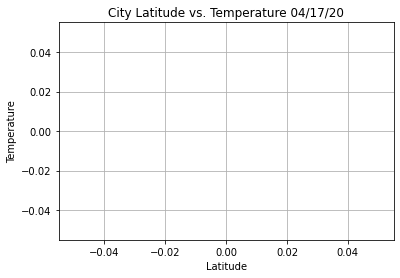

In [12]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolor="black")
plt.title(f'City Latitude vs. Temperature {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("output_data/lat_vs_temp.png")
plt.show()

# Save the plot
#plt.savefig("output_data/lat_vs_temp.png")

In [13]:
# This code plots today's temperature by latitude, showing that cities with the highest latitude (in the polar climate zone) have the lowest (coldest) temperatures. 

## Latitude vs. Humidity Plot

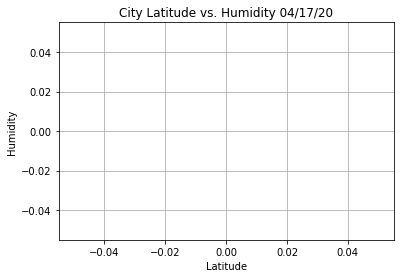

In [14]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolor="black")
plt.title(f'City Latitude vs. Humidity {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("output_data/lat_vs_humidity.png")
plt.show()

In [15]:
# The cities in the tropics have high levels of humidity, but since it's not summer yet, their humidity rates are more moderate.

## Latitude vs. Cloudiness Plot

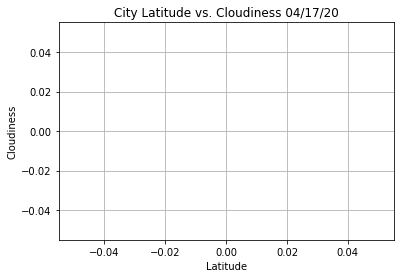

In [16]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolor="black")
plt.title(f'City Latitude vs. Cloudiness {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig("output_data/lat_vs_cloudiness.png")
plt.show()

In [17]:
# This plot shows that temperatures and humidities vary gradually with latitude due to the way air masses move. 

## Latitude vs. Wind Speed Plot

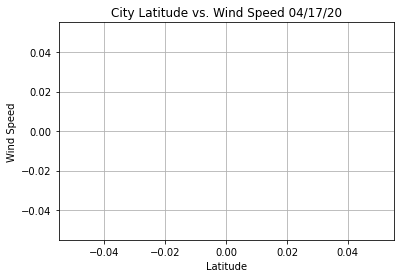

In [18]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolor="black")
plt.title(f'City Latitude vs. Wind Speed {date_today}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("output_data/lat_vs_wind_speed.png")
plt.show()

In [19]:
# This plot shows outliers of wind speed in cities near a latitude of 25. 

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[(clean_city_data["Lat"] > 0)]
northern_lat = northern["Lat"]
northern_temp = northern["Max Temp"]
northern_humidity = northern["Humidity"]
northern_cloudiness = northern["Cloudiness"]
northern_wind = northern["Wind Speed"]

southern = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
southern_lat = southern["Lat"]
southern_temp = southern["Max Temp"]
southern_humidity = southern["Humidity"]
southern_cloudiness = southern["Cloudiness"]
southern_wind = southern["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(northern_lat, northern_temp)
regress_values = slope * northern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_lat, northern_temp, marker="o", facecolors="lightblue")
plt.plot(northern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

ValueError: Inputs must not be empty.

In [ ]:
# The r value shows a strong correlation to max temperature and latitude 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(southern_lat, southern_temp)
regress_values = slope * southern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_lat, southern_temp, marker="o", facecolors="lightblue")
plt.plot(southern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows a moderate correlation to max temperature and latitude 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(northern_lat, northern_humidity)
regress_values = slope * northern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_lat, northern_humidity, marker="o", facecolors="lightblue")
plt.plot(northern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows a very weak correlation to humidty in northern latitudes

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(southern_lat, southern_humidity)
regress_values = slope * southern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_lat, southern_humidity, marker="o", facecolors="lightblue")
plt.plot(southern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows a very strong correlation to humidty in southern latitudes

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(northern_lat, northern_cloudiness)
regress_values = slope * northern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_lat, northern_cloudiness, marker="o", facecolors="lightblue")
plt.plot(northern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows a very weak correlation to cloudiness in northern latitudes

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(southern_lat, southern_cloudiness)
regress_values = slope * southern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_lat, southern_cloudiness, marker="o", facecolors="lightblue")
plt.plot(southern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows no correlation to cloudiness in southern latitudes

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(northern_lat, northern_wind)
regress_values = slope * northern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_lat, northern_wind, marker="o", facecolors="lightblue")
plt.plot(northern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows a very weak correlation between latitude and wind speed in northern latitudes

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(southern_lat, southern_wind)
regress_values = slope * southern_lat + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_lat, southern_wind, marker="o", facecolors="lightblue")
plt.plot(southern_lat, regress_values,"--", color="red")
plt.ylim()
plt.xlim()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
print(f"The r-squared is {rvalue**2}")
plt.show()

In [ ]:
# The r value shows a very weak correlation between latitude and wind speed in southern latitudes

In [ ]:
# Three observable trends based on the data:
#1) There are more cities in higher northern latitudes than they are in lower southern latitudes
#2) The temperature is more severve (colder) in the far northern cities than in the cities in the southern latitudes 
#3) Cloudiness is not determined by latitude